In [7]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve
from itertools import cycle

classes = ["0Arson", "1Assault", "2Fighting", "3RoadAccidents", "4Shooting", "5Stealing", "6Vandalism", "7Normal"]
# index is prepended because label binarizer wants alphabetical :(

def show_rocauc(test_file_path):
    y_test = []
    y_score = []
    with open(test_file_path, "r") as f:
        lines = [line.strip() for line in f.readlines()]
        for line in lines:
            filler, video, probabilties = [p.strip() for p in line.split("|")]
            for c in classes:
                _c = c[1:]
                if(_c in video):
                    true_class = c
            # print(video, true_class)
            probabilties = probabilties.split(" ")
            prob_arr = [float(s) for s in probabilties]
            y_test.append(true_class)
            y_score.append(prob_arr)
    y_score = np.array(y_score)
    

    label_binarizer = LabelBinarizer().fit(classes)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)
    for c in classes:
        class_of_interest = c
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
        class_index_in_classes = classes.index(c)

        display = RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_index_in_classes],
            name=f"{class_of_interest} vs the rest",
            color="darkorange",
            plot_chance_level=True,
        )
        _ = display.ax_.set(
            xlabel="False Positive Rate",
            ylabel="True Positive Rate",
            title="One-vs-Rest ROC curves:\n%s vs Rest"%(c),
        )

    
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(len(classes)):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= len(classes)

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
    
    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["maroon", "peru", "orange", "yellow", "darkolivegreen", "lime", "aqua", "slategrey", "blue"])
    for class_of_interest, color in zip(classes, colors):
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {class_of_interest}",
            color=color,
            ax=ax,
        )

    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
    )

# Training 1

Micro-averaged One-vs-Rest ROC AUC score:
0.73
Macro-averaged One-vs-Rest ROC AUC score:
0.76


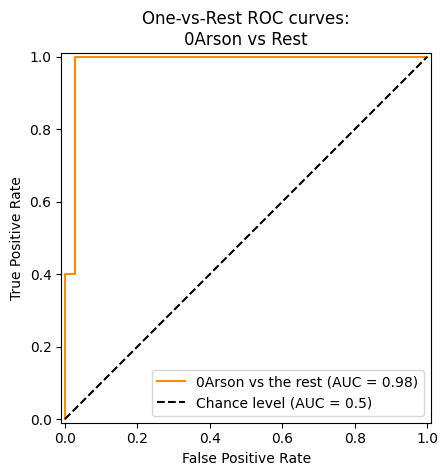

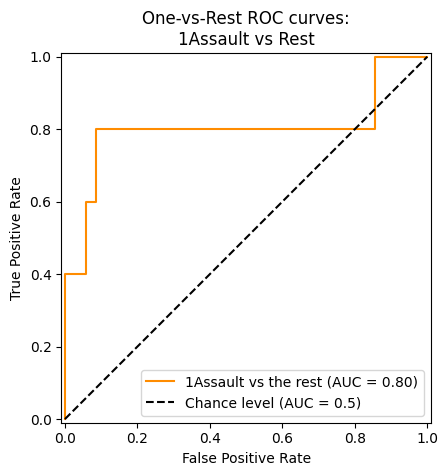

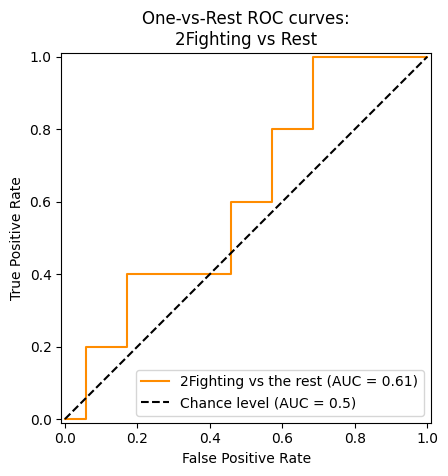

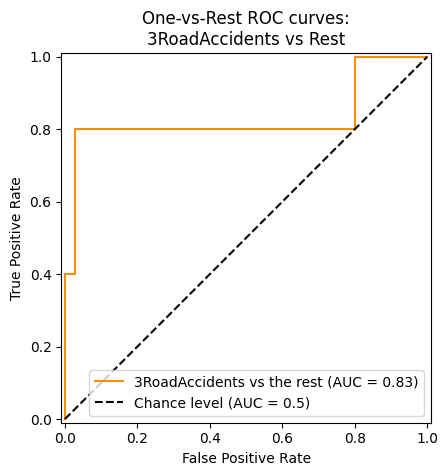

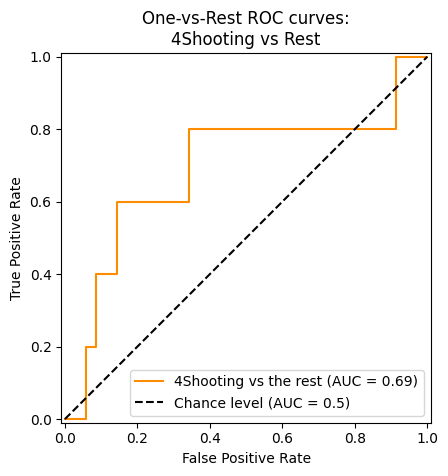

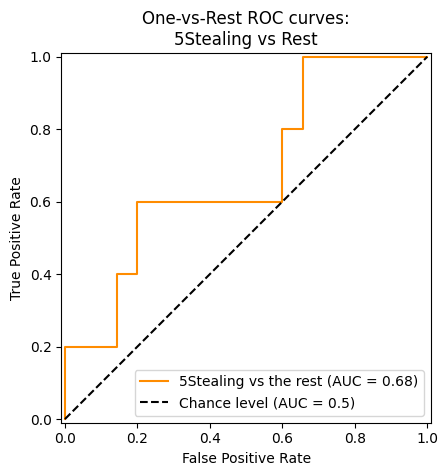

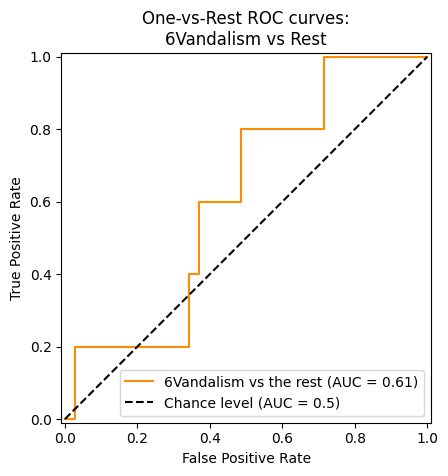

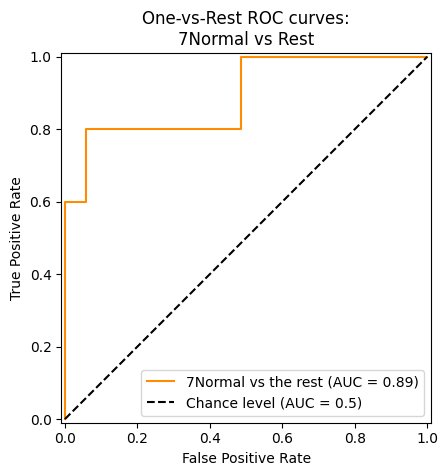

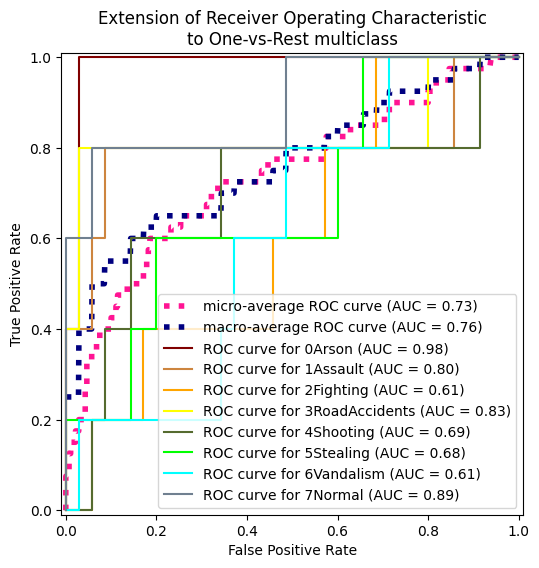

In [8]:
show_rocauc("./newmodels_info/Training1/test1.txt")

# Training 2

Micro-averaged One-vs-Rest ROC AUC score:
0.58
Macro-averaged One-vs-Rest ROC AUC score:
0.71


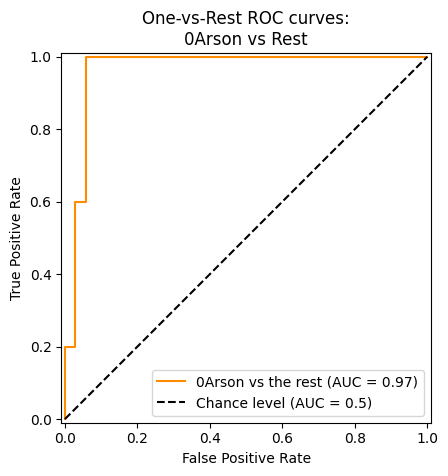

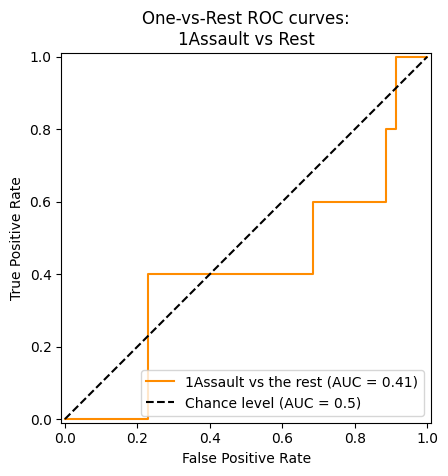

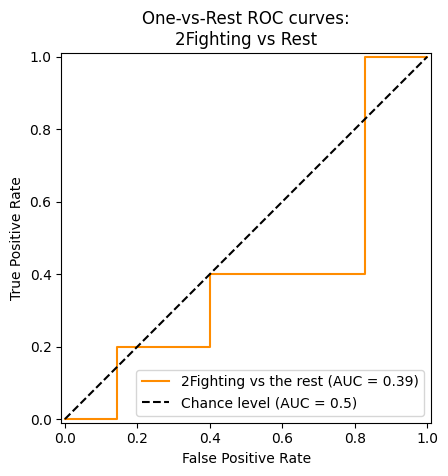

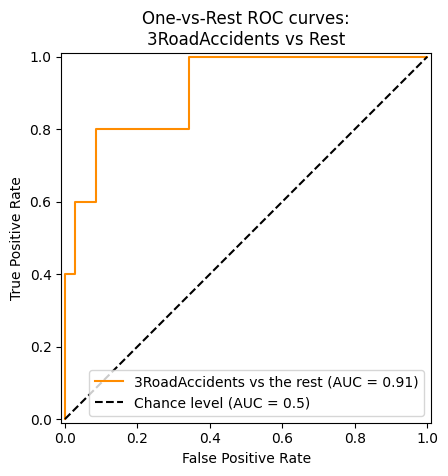

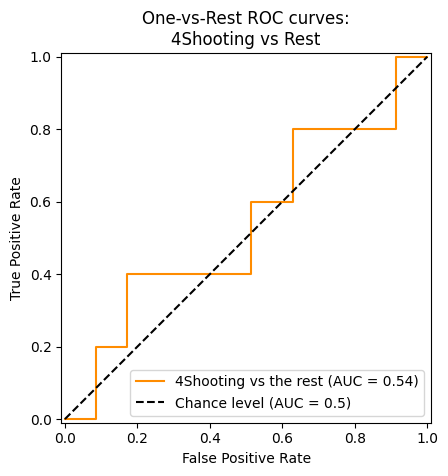

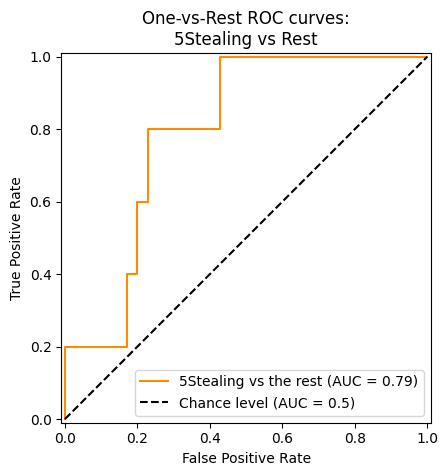

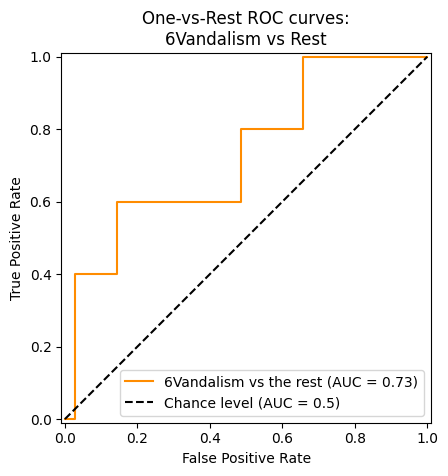

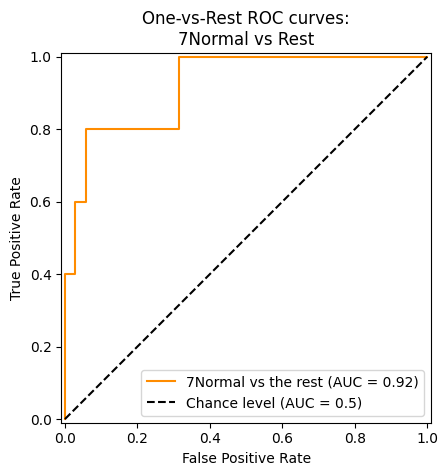

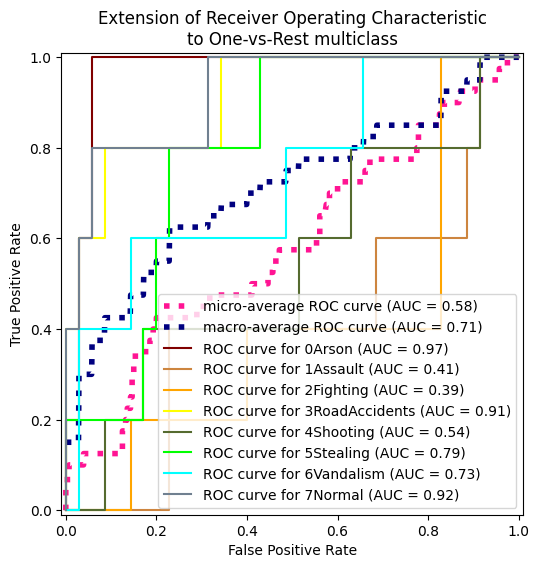

In [9]:
show_rocauc("./newmodels_info/Training2/test2.txt")

# Training 3

Micro-averaged One-vs-Rest ROC AUC score:
0.75
Macro-averaged One-vs-Rest ROC AUC score:
0.78


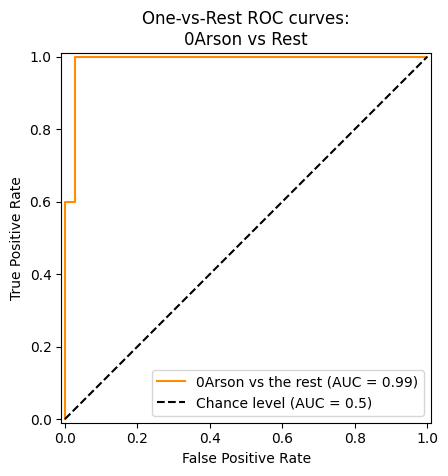

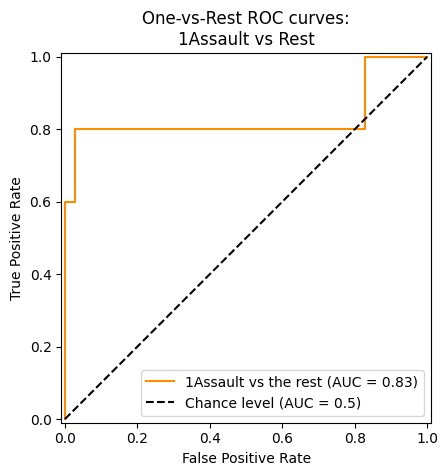

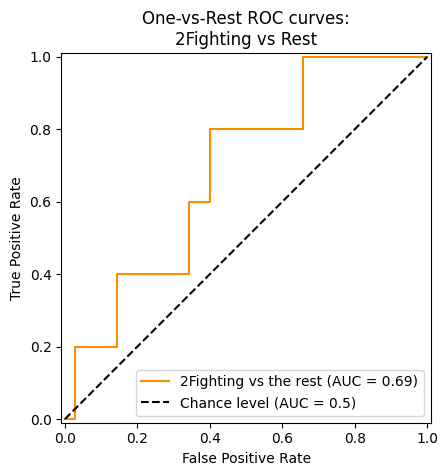

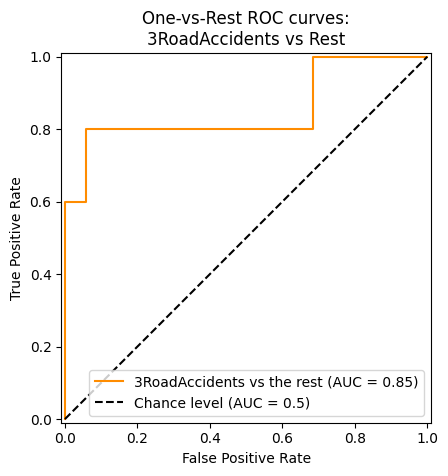

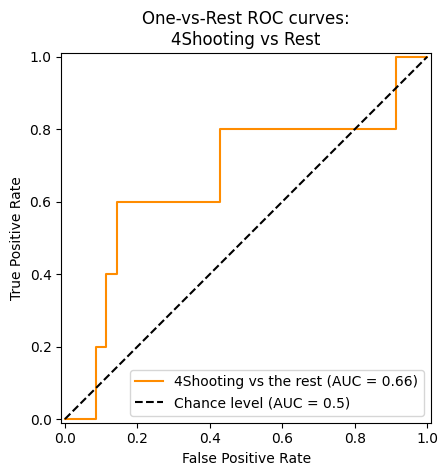

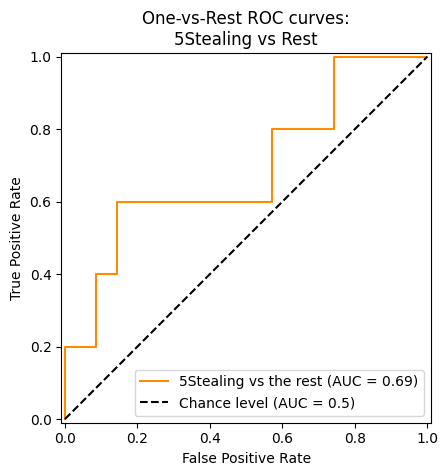

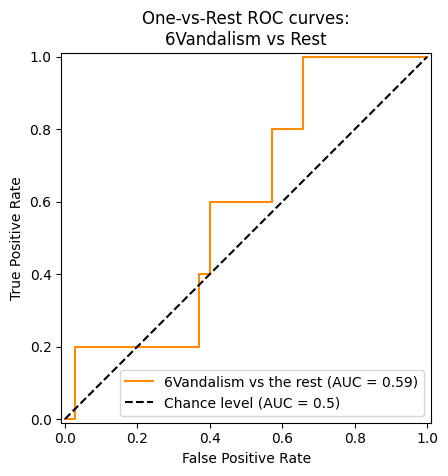

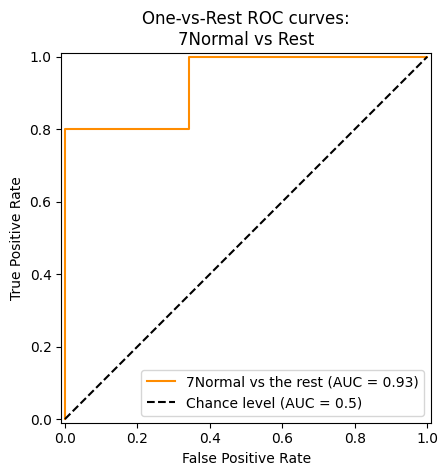

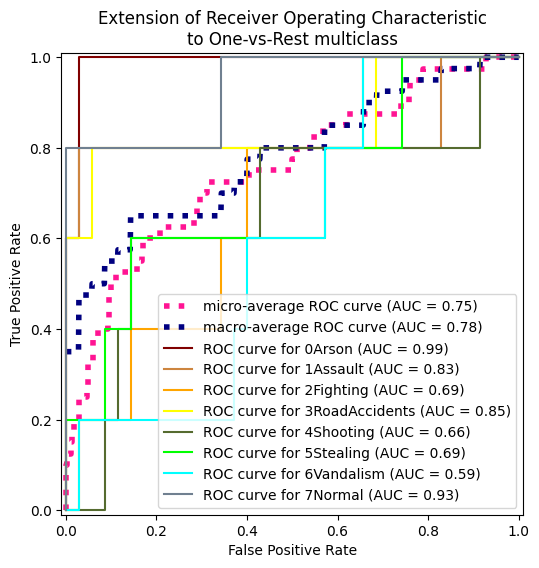

In [11]:
show_rocauc("./newmodels_info/Training3/test3.txt")

# Training 4

Micro-averaged One-vs-Rest ROC AUC score:
0.55
Macro-averaged One-vs-Rest ROC AUC score:
0.58


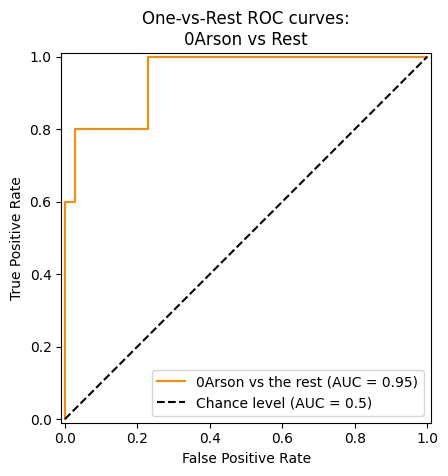

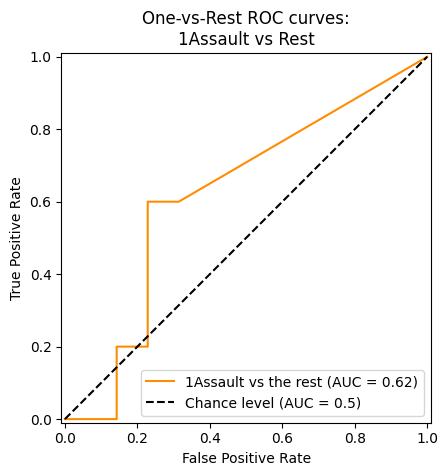

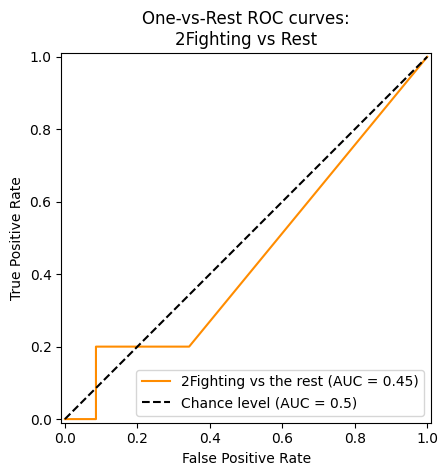

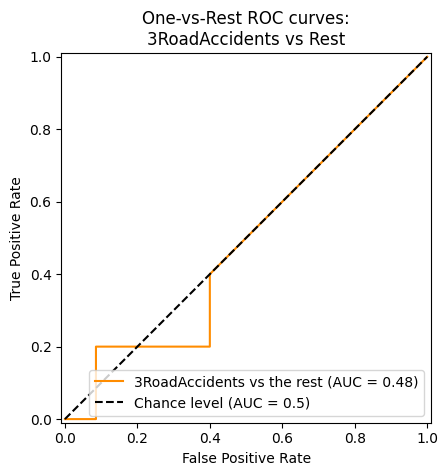

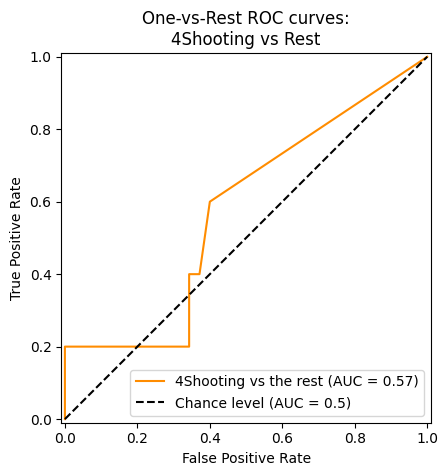

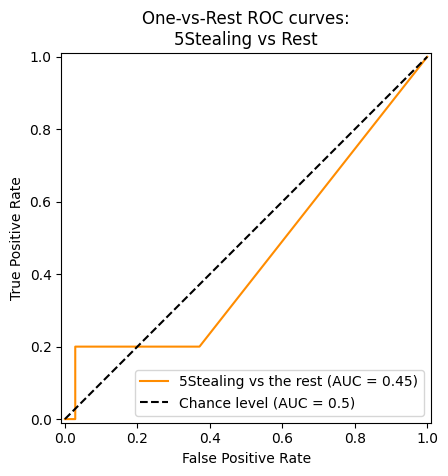

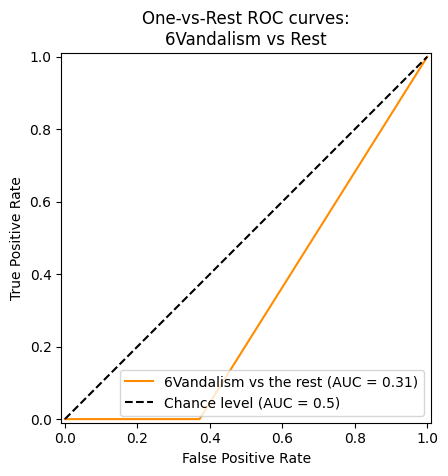

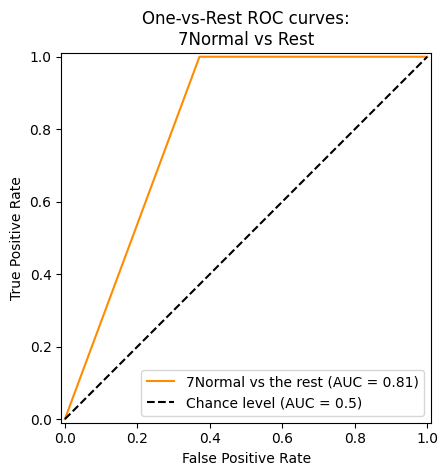

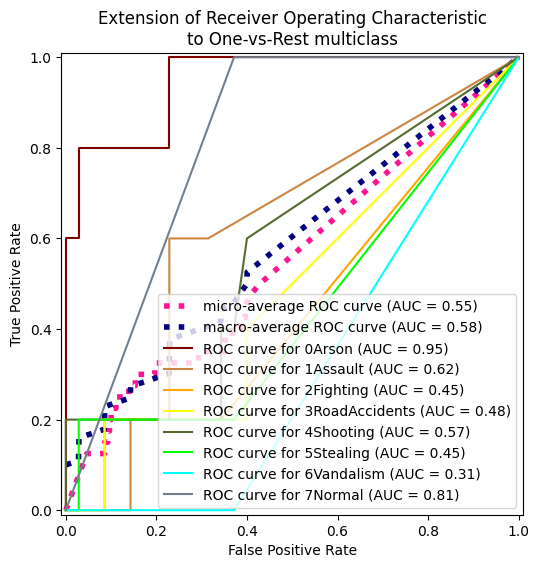

In [10]:
show_rocauc("./newmodels_info/Training4/test4.txt")